In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# default 

In [3]:
from os import path,listdir
from shutil import rmtree
import pandas as pd
import numpy as np
from job_offer_classifier.validations import KFoldPipe

job_offer_classifier.__version__

In [4]:
# Shutdown TF info logging
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Train and Save the  Estimator 

Choose the best estimator from the k fold validation routines

In [5]:
kfp = KFoldPipe(n_splits =5,src_file ='../data/raw/training_payloads.csv')
kfp.k_fold_validation()
best_seed = kfp.best_seed

In [6]:
kfp.random_state = best_seed
kfp.pipeline()

In [7]:
rmtree('../models/estimator',ignore_errors=True)
kfp.export_estimator('../models/estimator')

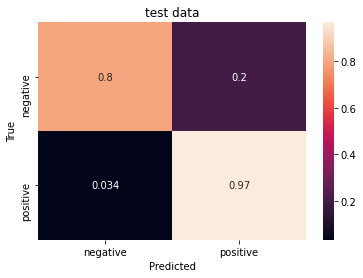

In [8]:
kfp.plot_confusion_matrix('test')

In [9]:
#kfp = KFoldPipe(n_splits =5,src_file ='../data/raw/training_payloads.csv',frac=0.1)

In [10]:
ex = kfp.dfs['test'].sample().iloc[0]
print(ex.payload,ex.sentiment,sep='\n\nsentiment\n')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
new device signed in to


india-jobs@sibatel.com
your google account was just signed in to from a new apple iphone device.
you're getting this email to make sure it was you.
check activity
you received this email to let you know about important changes to your
google account and services.
â© 2019 google llc, 1600 amphitheatre parkway, mountain view, ca 94043, usa









sentiment
1


In [11]:
kfp.estimator.model_dir

'/tmp/tmpmlgh4htz'